In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [167]:
data = pd.read_csv("6D_merged.csv")
data.head()

,Det,P_Type,x[mm],y[mm],z[mm],px[MeV/c],py[MeV/c],pz[MeV/c],E[GeV]
0,1,pi-,19.4147,155.97900,2099.5,-1.75748,-73.51180,111.607,0.053673
1,1,pi+,-387.7760,-152.85100,2099.5,127.14800,28.56080,321.444,0.234312
2,2,pi-,-169.6470,-4.43895,5509.5,-51.83480,-2.24166,219.319,0.125520
3,1,mu-,-334.6950,-47.52810,2100.5,-98.57320,1.68666,-261.309,0.192948
4,1,mu-,265.1510,8.65126,2099.5,234.10400,-2.72210,143.895,0.188759


In [168]:
det = np.array(data['Det'].to_list())
particle = np.array(data['P_Type'].to_list())
px = np.array(data['px[MeV/c]'].to_list())
py = np.array(data['py[MeV/c]'].to_list())
pz = np.array(data['pz[MeV/c]'].to_list())
x = np.array(data['x[mm]'].to_list())
y = np.array(data['y[mm]'].to_list())
z = np.array(data['z[mm]'].to_list())
E = np.array(data['E[GeV]'].to_list())
det1_particles = []
det1_px = []
det1_py = []
det1_pz = []
det1_x = []
det1_y = []
det1_z = []
det2_particles = []
det2_px = []
det2_py = []
det2_pz = []
det2_x = []
det2_y = []
det2_z = []
det3_particles = []
det3_px = []
det3_py = []
det3_pz = []
det3_x = []
det3_y = []
det3_z = []
det3_pi_mu_plus_x = []
det3_pi_mu_minus_x = []
det3_pi_mu_plus_y = []
det3_pi_mu_minus_y = []
det1_E = []
det2_E = []
print(len(det))

4837


In [169]:
for i in range(0, len(det)):
    if det[i] == 1:
        det1_particles.append(particle[i])
        det1_px.append(px[i])
        det1_py.append(py[i])
        det1_pz.append(pz[i])
        det1_x.append(x[i])
        det1_y.append(y[i])
        det1_z.append(z[i])
        det1_E.append(E[i])
    elif det[i] == 2:
        det2_particles.append(particle[i])
        det2_px.append(px[i])
        det2_py.append(py[i])
        det2_pz.append(pz[i])
        det2_x.append(x[i])
        det2_y.append(y[i])
        det2_z.append(z[i])
        det2_E.append(E[i])
    elif det[i] == 3:
        det3_particles.append(particle[i])
        det3_px.append(px[i])
        det3_py.append(py[i])
        det3_pz.append(pz[i])
        det3_x.append(x[i])
        det3_y.append(y[i])
        det3_z.append(z[i])
        if(particle[i] == 'pi+' or particle[i] == 'mu+'):
            det3_pi_mu_plus_x.append(x[i])
            det3_pi_mu_plus_y.append(y[i])
        if(particle[i] == 'pi-' or particle[i] == 'mu-'):
            det3_pi_mu_minus_x.append(x[i])
            det3_pi_mu_minus_y.append(y[i])

len(det2_particles)

1083

In [170]:
from collections import Counter

counts = Counter(det1_particles)
categories1 = list(counts.keys())
values1 = list(counts.values())


In [171]:
counts = Counter(det2_particles)
categories2 = list(counts.keys())
values2 = list(counts.values())

In [172]:
counts = Counter(det3_particles)
categories3 = list(counts.keys())
values3 = list(counts.values())

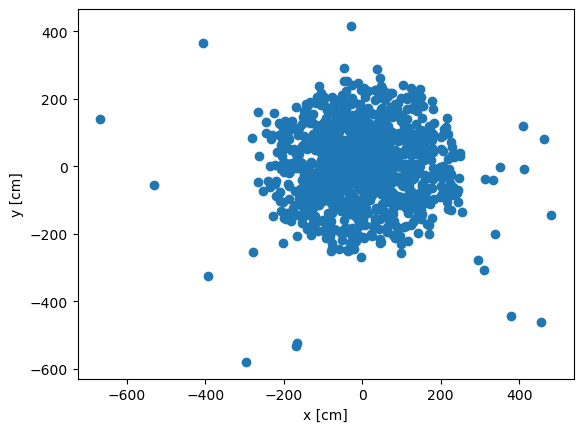

In [173]:
plt.scatter(det2_x,det2_y)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.show()

In [174]:
def compute_and_plot_emittance(x_list, px_list, pz_list):
    # Convert lists to numpy arrays
    x = np.array(x_list)
    px = np.array(px_list)
    pz = np.array(pz_list)
    
    # Compute x' = px / pz
    xp = px / pz

    # Center data
    x_mean = np.mean(x)
    xp_mean = np.mean(xp)
    x_c = x - x_mean
    xp_c = xp - xp_mean

    # Compute statistical moments
    x2 = np.mean(x_c**2)
    xp2 = np.mean(xp_c**2)
    xxp = np.mean(x_c * xp_c)

    # Calculate geometric emittance
    emittance = np.sqrt(x2 * xp2 - xxp**2)
    print(f"Geometric Emittance: {emittance:.3e} mm")

    # Plotting phase space
    
    plt.scatter(x, xp)
    plt.xlabel("x [mm]")
    plt.ylabel("x' [rad]")
    plt.title("Transverse Phase Space (x vs x')")
    plt.grid(True)
    plt.axis('equal')
    plt.show()

    return emittance

In [175]:
det_pos = [4, 10.5, 17.5] # in meters

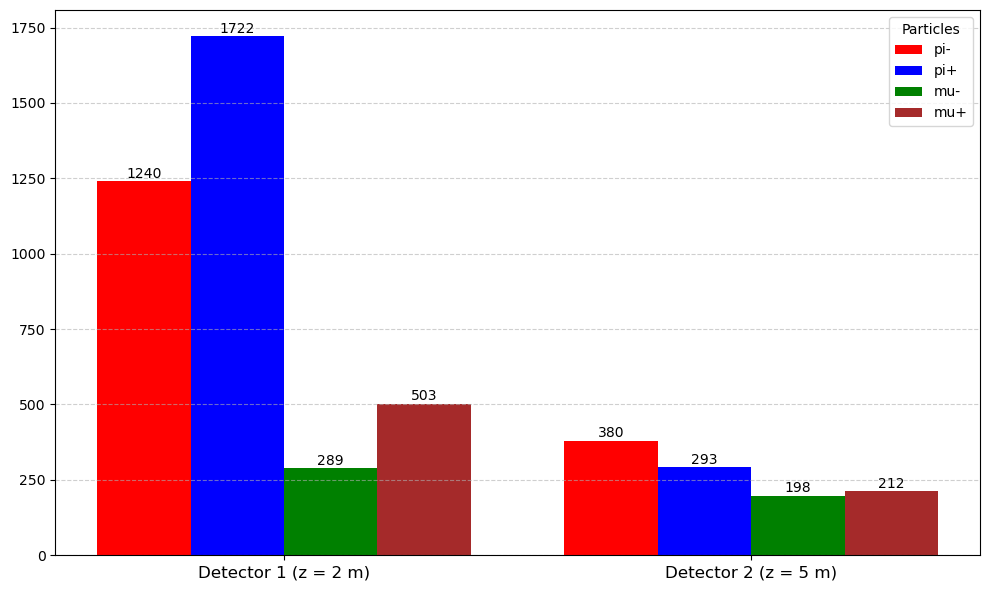

In [176]:
colors = ['red', 'blue', 'green', 'brown']

# Number of sets
n_sets = 2
x = np.arange(n_sets)  # One x-position per set
width = 0.2            # Width of each bar

plt.figure(figsize=(10, 6))

# Keep track of all BarContainers so we can annotate them afterward
all_bars = []

for i, (particle, color) in enumerate(zip(categories1, colors)):
    values = [values1[i], values2[i]]
    bars = plt.bar(x + i * width, values, width=width, label=particle, color=color)
    all_bars.append(bars)

# Annotate each bar with its height
for bars in all_bars:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,  # x position: center of the bar
            height + 1,                         # y position: just above the bar
            f'{int(height)}',                   # the label
            ha='center', va='bottom',
            fontsize=10                          # tweak as needed
        )

# X-axis setup
plt.xticks(
    x + width * 1.5,
    ['Detector 1 (z = 2 m)', 'Detector 2 (z = 5 m)'],
    fontsize=12,
)

plt.legend(title='Particles')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

In [177]:
len(det1_x)

3754

In [178]:
len(det2_x)

1083

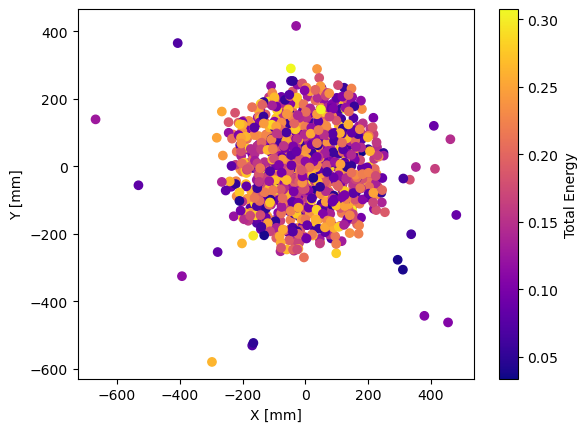

In [179]:
sc = plt.scatter(det2_x, det2_y, c=det2_E, cmap="plasma")
plt.xlabel("X [mm]")
plt.ylabel("Y [mm]")
plt.colorbar(sc, label="Total Energy")
plt.show()

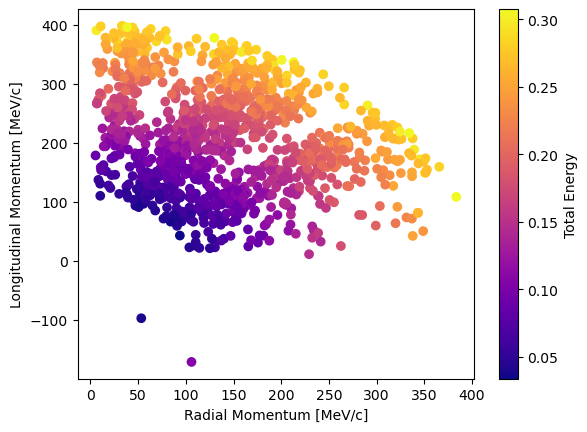

In [180]:
det2_pr = np.sqrt(np.array(det2_px)**2 + np.array(det2_py)**2)
sc = plt.scatter(det2_pr, det2_pz, c=det2_E, cmap="plasma")
plt.colorbar(sc, label="Total Energy")
plt.xlabel("Radial Momentum [MeV/c]")
plt.ylabel("Longitudinal Momentum [MeV/c]")
plt.show()

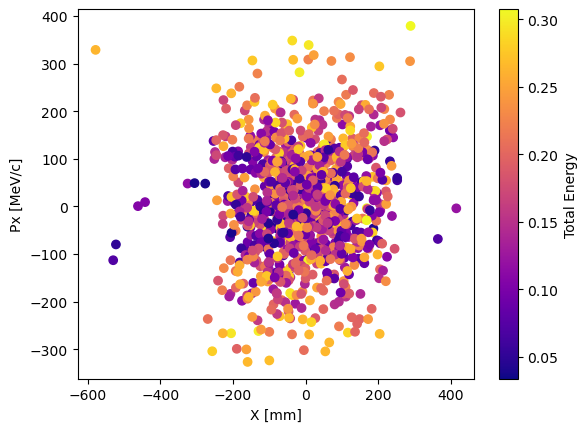

In [182]:
sc = plt.scatter(det2_y, det2_py, c=det2_E, cmap="plasma")
plt.colorbar(sc, label="Total Energy")
plt.xlabel("X [mm]")
plt.ylabel("Px [MeV/c]")
plt.show()

In [164]:
xn = np.sum(np.array(det2_x)**2)/len(det2_x)
x_prime = np.sum((np.array(det2_px)/np.array(det2_pz))**2)/len(det2_px)
x_x_prime = np.sum(np.array(det2_x)*np.array(np.array(det2_px)/np.array(det2_pz)))/len(det2_x)

In [165]:
import math
emittance = math.sqrt(xn*x_prime - (x_x_prime)**2)
print(emittance/10, "cm")

11.920053472393718 cm


In [166]:
yn = np.sum(np.array(det2_y)**2)/len(det2_y)
y_prime = np.sum((np.array(det2_py)/np.array(det2_pz))**2)/len(det2_py)
y_y_prime = np.sum(np.array(det2_y)*np.array(np.array(det2_py)/np.array(det2_pz)))/len(det2_y)
emittance = math.sqrt(yn*y_prime - (y_y_prime)**2)
print(emittance/10, "cm")

10.786268218004953 cm


In [183]:
def get_emit(mask_upper, mask_lower=0):
    # pip = pi+
    x_pip_mask = []
    y_pip_mask = []
    tx_pip_mask = []
    ty_pip_mask = []
    tz_pip_mask = []
    ene_pip_mask = []
    
    for i in range(len(ene_pip)): # ene_pip is a list of all the energy values of pi+, the length of the list is the total number of pi+
        x = det2_x[i] # x_pip : stores x positions of pi+
        y = det2_y[i] # y_pip : stores y positions of pi+
        tx = det2_px[i] # tx_pip : stores directions of pi+ in x, you can substitute this with px
        ty = det2_py[i] # ty_pip : stores directions of pi+ in y, you can substitute this with py
        tz = det2_pz[i] # tz_pip : stores directions of pi+ in z, you can substitute this with pz
        ene = det2_E[i] # ene_pip : stores energies of of pi+
        if (ene <= mask_upper) and (ene >= mask_lower):
            x_pip_mask.append(x)
            y_pip_mask.append(y)
            tx_pip_mask.append(tx)
            ty_pip_mask.append(ty)
            tz_pip_mask.append(tz)
            ene_pip_mask.append(ene)
    
    # to get x', I divide tx/tz... here you can do px/pz
    xp_pip_mask = np.divide(tx_pip_mask,tz_pip_mask)
    # same thing for y'... 
    yp_pip_mask = np.divide(ty_pip_mask,tz_pip_mask)

    mech_matrix = [
        x_pip_mask,
        xp_pip_mask,
        y_pip_mask,
        yp_pip_mask
    ]
    
    covariance = np.cov(mech_matrix)
    determinant = np.linalg.det(covariance)
    mech_emit = determinant**(1/4)

    x_xp = list(zip(x_pip_mask, xp_pip_mask))
    y_yp = list(zip(y_pip_mask, yp_pip_mask))

    return mech_emit, x_xp, y_yp, ene_pip_mask